In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [298]:
train_data = pd.read_csv("C:\\Users\\Anand G\\Downloads\\titanic\\train.csv")
test_data = pd.read_csv("C:\\Users\\Anand G\\Downloads\\titanic\\test.csv")


In [299]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [300]:
train_data.shape,test_data.shape


((891, 12), (418, 11))

In [301]:
y= train_data["Survived"]

In [302]:
train_data.drop(columns=['Survived'],inplace=True)

In [303]:
#adding source column for the dataset

train_data['Source'] = 'Train'
test_data['Source'] ='Test'

#merging the train and test

df=train_data.append(test_data)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Source
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Test
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Test
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Test
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Test


In [304]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Source            0
dtype: int64

In [305]:
# drop the columns -- dropping Cabin as there are more than 50 % values are 

df.drop(columns =['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [306]:
# female & male travellers
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [307]:
#gender %

male = ((df.Sex == 'male').sum() / df["Sex"].count())*100
female = ((df.Sex == 'female').sum() / df["Sex"].count())*100
male,female

(64.40030557677616, 35.59969442322384)

In [308]:
df_bkp = df


In [309]:
df.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Source'], dtype='object')

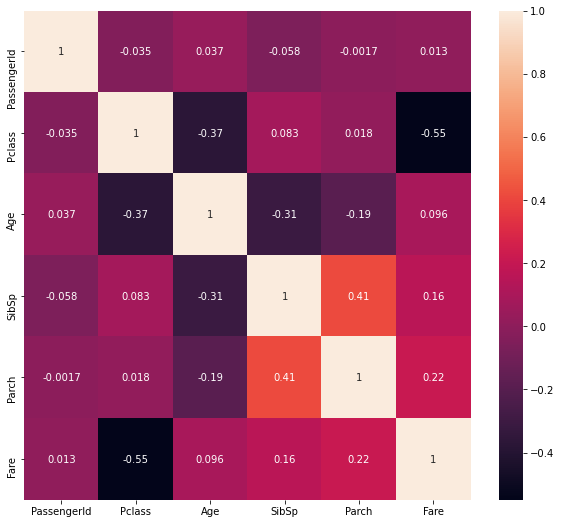

In [310]:
plt.figure(figsize=(10,9))

sns.heatmap(train_data.corr(), annot=True)

plt.show()

In [311]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df['Fare'] =  df["Fare"].fillna(df["Fare"].mean())

In [312]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Source
0,3,male,22.0,1,0,7.2500,S,Train
1,1,female,38.0,1,0,71.2833,C,Train
2,3,female,26.0,0,0,7.9250,S,Train
3,1,female,35.0,1,0,53.1000,S,Train
4,3,male,35.0,0,0,8.0500,S,Train


In [313]:
dummies = pd.get_dummies(df.select_dtypes(exclude ='number'),drop_first=True)

In [314]:
df = df.drop(columns=["Sex","Embarked","Source"])

In [315]:
dummies

,Sex_male,Embarked_Q,Embarked_S,Source_Train
0,1,0,1,1
1,0,0,0,1
2,0,0,1,1
3,0,0,1,1
4,1,0,1,1
...,...,...,...,...
413,1,0,1,0
414,0,0,0,0
415,1,0,1,0
416,1,0,1,0


In [316]:
df["Sex_male"] = dummies["Sex_male"]
df["Embarked_Q"] = dummies["Embarked_Q"]
df["Embarked_S"] = dummies ["Embarked_S"]
df["Source_Train"] = dummies["Source_Train"]


In [317]:
df.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
Source_Train    0
dtype: int64

In [318]:
train = df.loc[df['Source_Train']==1]
test = df.loc[df['Source_Train']!=1]

In [319]:
train.shape,test.shape

((891, 9), (418, 9))

In [320]:
from sklearn.linear_model import LogisticRegression

In [321]:
model = LogisticRegression()
model.fit(train,y)

C:\Users\Anand G\anaconda3\ANACONDA3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [322]:
y_pred=model.predict(test)

In [323]:
model.score(test,y_pred)

1.0

In [324]:
model.score(train,y)

0.7991021324354658

In [325]:
df_test= pd.read_csv("C:\\Users\\Anand G\\Downloads\\titanic\\test.csv")
Id = df_test['PassengerId']

In [326]:
result =pd.DataFrame()

In [327]:
result['PassengerId'] = Id
result['Survived'] = y_pred

In [328]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [330]:
result.to_csv('submission.csv', index = False)